Summarize Coastal Vulnerability results by subregions.
For example, plot the average 'coastal_exposure' or 'habitat_role' value for all points within an area.

Intersect points with subregion polygons, make boxplots.

In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# workspace = '../mpa-removeall-habitat/cv-output-invest3.3.0/'

In [2]:
ce_pts = gpd.read_file('../mpa-removeall-habitat/scenario_data/national_cv_3scenarios.shp')

In [20]:
# ce_data = pd.read_csv(os.path.join(workspace, 'outputs/coastal_exposure/coastal_exposure.csv'))

In [3]:
subregions = gpd.read_file('/home/dmf/bahamas-mpa/cv/cv-fromjess/Bahamas_regionalCV_Inputs/LandPoly_Bahamas_subregions.shp')

In [14]:
subregions['geometry'] = subregions.buffer(400)

In [21]:
pts_in_region = gpd.sjoin(ce_pts, subregions, how='inner', op='intersects')

In [19]:
pts_in_region.head()

,FID,geometry
0,0.0,POINT (162996.410662489 3019659.244384566)
1,1.0,POINT (162746.410662489 3019409.244384566)
2,2.0,POINT (163246.410662489 3019409.244384566)
3,3.0,POINT (163496.410662489 3019409.244384566)
4,4.0,POINT (162746.410662489 3019159.244384566)


In [12]:
pts_in_region.size

245448

In [13]:
dat = pts_in_region

In [22]:
dat2 = dat.join(ce_data, on='FID', how='left')

In [23]:
dat2.head()

,FID,geometry,index_right,CROSS_SHLF,Name,ORIG_FID,Subregion,sq_meter,sqmeter_2,x,...,array row,array col,shore_exposure,relief,natural_habitats,wave_exposure,surge_potential,coastal_exposure,coastal_exposure_no_habitats,habitat_role
0,0.0,POINT (162996.410662489 3019659.244384566),16,None,Abaco,2326,North/Northwestern,633851,633851,162996.410662,...,363,979,1.0,1,1.75862,5,4,2.43529,3.16228,0.726989
1,1.0,POINT (162746.410662489 3019409.244384566),16,None,Abaco,2326,North/Northwestern,633851,633851,162746.410662,...,364,978,1.0,1,1.75862,5,4,2.43529,3.16228,0.726989
2,2.0,POINT (163246.410662489 3019409.244384566),16,None,Abaco,2326,North/Northwestern,633851,633851,163246.410662,...,364,980,1.0,1,1.75862,5,4,2.43529,3.16228,0.726989
3,3.0,POINT (163496.410662489 3019409.244384566),16,None,Abaco,2326,North/Northwestern,633851,633851,163496.410662,...,364,981,1.0,1,1.75862,5,4,2.43529,3.16228,0.726989
4,4.0,POINT (162746.410662489 3019159.244384566),16,None,Abaco,2326,North/Northwestern,633851,633851,162746.410662,...,365,978,1.0,1,1.75862,5,4,2.43529,3.16228,0.726989


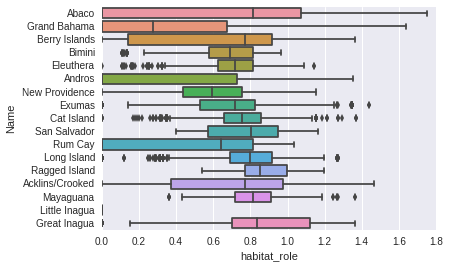

In [24]:
sns.boxplot(x="habitat_role", y="Name", data=dat2)

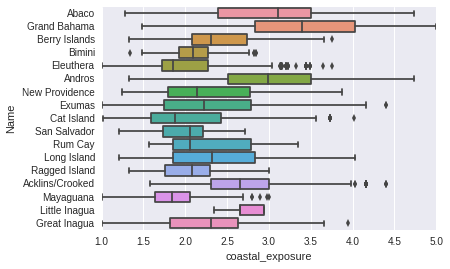

In [25]:
sns.boxplot(x="coastal_exposure", y="Name", data=dat2)